# After Training

In this exercise, you will create a deep learning model, save it, and load it to evaluate its performance on unseen data.

In [19]:
# Initial imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ann_visualizer.visualize import ann_viz
import graphviz as gv

In [4]:
# Read in data
data = Path("../Resources/music.csv")
df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [5]:
# Define the features set 'X', and the target 'y' set.
X = df.iloc[:, 0:67].values
y = df.iloc[:, 68:70].values

In [6]:
y[:20]

array([[-15.75, -47.95],
       [ 14.91, -23.51],
       [ 12.65,  -8.  ],
       [  9.03,  38.74],
       [ 34.03,  -6.85],
       [ 12.65,  -8.  ],
       [ 12.65,  -8.  ],
       [ 14.66, -17.41],
       [ 52.5 ,  -0.12],
       [ 41.26,  69.21],
       [ 41.26,  69.21],
       [ 41.9 ,  12.48],
       [ 28.61,  77.2 ],
       [ 33.66,  73.16],
       [ 54.68,  25.31],
       [ 44.41,  26.1 ],
       [ 44.41,  26.1 ],
       [ 52.5 ,  -0.12],
       [ 44.41,  26.1 ],
       [ 44.41,  26.1 ]])

In [7]:
# Split the data into training and testing sets using the train_test_split method from sklearn.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [8]:
# Scale the data for the features set X_tain and X_test
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Create a neural network with 1 hidden layer
nn = Sequential()
number_inputs = 67
number_hidden_nodes = 8

#hidden layer
nn.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))
number_classes = 2

# Output layer
nn.add(Dense(units=2, activation="linear"))
nn.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 544       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 562
Trainable params: 562
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile model
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# fit & Train the model
model_1 = nn.fit(X_train, y_train, validation_split=0.3, epochs=210, verbose=0)

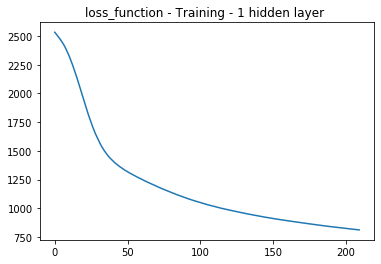

In [11]:
# Plot the training loss function
plt.plot(model_1.history["loss"])
# #plt.plot(model_2.history["loss"])
plt.title("loss_function - Training - 1 hidden layer ")
#plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()


In [12]:
# Save model as JSON
nn_json = nn.to_json()
file_path = Path("../Resources/model.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = "../Resources/model.h5"
nn.save_weights(file_path)

In [13]:
# Load the model to predict values
from tensorflow.keras.models import model_from_json

# Load json and create model
file_path = Path("../Resources/model.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Load weights into new model
file_path = "../Resources/model.h5"
loaded_model.load_weights(file_path)

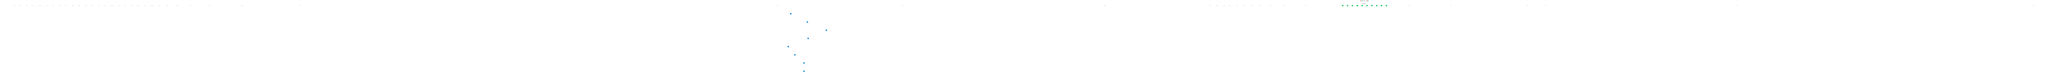

In [57]:
#from ann_visualizer.visualize import ann_viz
ann_viz(loaded_model, view=True, filename='ANN.gv', title="Artificial Neural network - Model Visualization")
from graphviz import Source
Source.from_file('network.gv', format='png', engine='dot', encoding='utf-8')

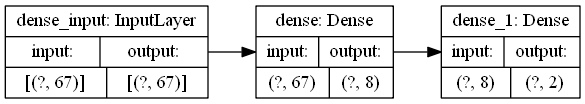

In [36]:
#img
tf.keras.utils.plot_model(
    loaded_model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=True, dpi=96
)

In [58]:
# Predict values using the testing data
from sklearn.metrics import mean_squared_error

y_pred = loaded_model.predict(X_test_scaled)

In [59]:
# Evaluate the model with the MSE metric
print(mean_squared_error(y_test, y_pred))

1196.9461870948728


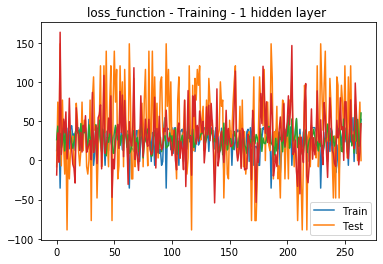

In [60]:
plt.plot(y_test)
plt.plot(y_pred)
plt.title("loss_function - Training - 1 hidden layer ")
plt.legend(["Train", "Test"])
plt.show()

In [ ]:
y_test[:20]